# Pandas + pySpark

Para este primer ejercicio se utilizará unicamente pandas como viene estándar y se medirán los tiempos de ejecución

## Carga de datos

Los datos que se utilizara para este ejercicio vienen de la base de datos de mongo son comentarios de twitter y el archivo tiene un peso de 112,2 MB

### Inicialización SparkSession

Las aplicaciones de PySpark comienzan con la inicialización, *SparkSession* que es el punto de entrada de PySpark como se muestra a continuación. En caso de ejecutarlo en el shell PySpark a través del ejecutable pyspark, el shell crea automáticamente la sesión en la variable spark para los usuarios. https://spark.apache.org/docs/latest/api/python/getting_started/quickstart.html

In [1]:
import pyspark
from pyspark import SparkContext

sc =SparkContext()

In [2]:
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [104]:
from pyspark.sql import Row
from pyspark.sql import SQLContext
import pyspark.sql.functions as F
 
sqlContext = SQLContext(sc)

In [4]:
import timeit
import pyspark
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
from pyspark.sql import functions as F
pd.options.mode.chained_assignment = None
plt.style.use('ggplot')

In [5]:
def plot_time(time_list, name):
    plt.figure(figsize=(14, 4))
    p = sum(time_list) / num
    plt.scatter(range(len(load_data)), time_list, color='blue')
    plt.title('Tiempo por ejecución de: {}, tiempo promedio {} seg'.format(name, round(p, 3)))
    plt.hlines(y=p, xmin=0, xmax=len(time_list), color='red')
    plt.ylabel('Tiempo en segundos')
    plt.xlabel('Ejecuciones')
    plt.show()

In [6]:
# numero de veces a repetir cada prueba
num = 5

In [9]:
FOLDER_DATA = '/home/datascience3/Data_Test/Data_sample_com_fb/'
FILE = 'facebook_lib_facebook_comments.csv'

In [55]:
df = sqlContext.read.csv(pyspark.SparkFiles.get(FOLDER_DATA + FILE),
                         sep=',',
                         header=True,
                         inferSchema=True)

* Tutorial https://guru99.es/pyspark-tutorial/
* Doc https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.DataFrameReader.csv.html#pyspark.sql.DataFrameReader.csv

In [56]:
df.count()

2795104

In [57]:
df.printSchema()

root
 |-- _id: string (nullable = true)
 |-- id: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- post_id: string (nullable = true)
 |-- comment_id: string (nullable = true)
 |-- parent_id: string (nullable = true)
 |-- created_time: string (nullable = true)
 |-- attachment: string (nullable = true)
 |-- comment_count: string (nullable = true)
 |-- like_count: string (nullable = true)
 |-- from_id: string (nullable = true)
 |-- from_name: string (nullable = true)
 |-- message: string (nullable = true)
 |-- message_tags: string (nullable = true)
 |-- message_google_json: string (nullable = true)
 |-- user_id: string (nullable = true)



In [11]:
df.show(2)

+--------------------+---+-------------------+--------------------+--------------------+-------------------+--------------+-------------+--------------------+--------------------+--------------------+-----------+------------------+----------------+-------------------+-----------------+---------------+-----------+-----------+-------------+--------------+--------------------+---------------------+-------------------+-----------------------+-----------+--------+---------------+----------------+-----------------------+----------------+--------+-----------------+----+-------------+----------------------+--------------------+--------------------+--------------------+--------------------+----------------+-----------+--------------------+--------------------+
|                 _id| id|           tweet_id|          created_at|                text|         twitter_id|   screen_name|         name|         description|  account_created_at|         ac_location|ac_verified|ac_followers_count|ac_frie

## Prueba de datos recurrente

In [58]:
load_data = []
for i in range(num):
    start_time = timeit.default_timer()
    df = sqlContext.read.csv(pyspark.SparkFiles.get(FOLDER_DATA + FILE),
                             header=True, inferSchema= True)
    load_data.append(timeit.default_timer() - start_time)

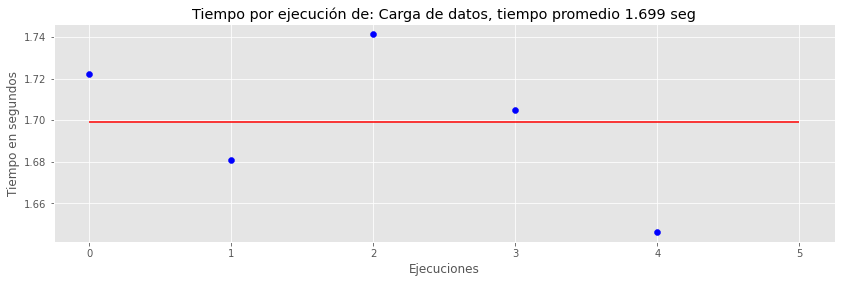

In [59]:
plot_time(load_data, name='Carga de datos')

In [60]:
df.count()

2795104

In [61]:
df.printSchema()

root
 |-- _id: string (nullable = true)
 |-- id: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- post_id: string (nullable = true)
 |-- comment_id: string (nullable = true)
 |-- parent_id: string (nullable = true)
 |-- created_time: string (nullable = true)
 |-- attachment: string (nullable = true)
 |-- comment_count: string (nullable = true)
 |-- like_count: string (nullable = true)
 |-- from_id: string (nullable = true)
 |-- from_name: string (nullable = true)
 |-- message: string (nullable = true)
 |-- message_tags: string (nullable = true)
 |-- message_google_json: string (nullable = true)
 |-- user_id: string (nullable = true)



https://docs.databricks.com/spark/latest/dataframes-datasets/introduction-to-dataframes-python.html

In [63]:
df.select('like_count').show()

+----------+
|like_count|
+----------+
|         0|
|         0|
|      null|
|      null|
|      null|
|      null|
|      null|
|      null|
|      null|
|      null|
|      null|
|      null|
|      null|
|      null|
|      null|
|      null|
|      null|
|      null|
|      null|
|      null|
+----------+
only showing top 20 rows



In [64]:
df.describe('like_count').show(truncate=False)

+-------+----------------------------------------------------------------------------------------------------------------+
|summary|like_count                                                                                                      |
+-------+----------------------------------------------------------------------------------------------------------------+
|count  |999319                                                                                                          |
|mean   |0.963308167302331                                                                                               |
|stddev |7.958885783912594                                                                                               |
|min    |   ósea que va crecer la comunidad del LGTB 🤣y los muertos. 😓 La gripa por  AVIAR   H5N1 como la gripa PORCINA|
|max    |” as the old saying goes.""                                                                                     |
+-------+---------

In [65]:
df = df.withColumn("like_count", df["like_count"].cast(pyspark.sql.types.IntegerType()))

In [66]:
df.describe('like_count').show()

+-------+-----------------+
|summary|       like_count|
+-------+-----------------+
|  count|           997907|
|   mean|0.963307201973731|
| stddev|7.958881854537847|
|    min|                0|
|    max|             1388|
+-------+-----------------+



In [67]:
df.printSchema()

root
 |-- _id: string (nullable = true)
 |-- id: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- post_id: string (nullable = true)
 |-- comment_id: string (nullable = true)
 |-- parent_id: string (nullable = true)
 |-- created_time: string (nullable = true)
 |-- attachment: string (nullable = true)
 |-- comment_count: string (nullable = true)
 |-- like_count: integer (nullable = true)
 |-- from_id: string (nullable = true)
 |-- from_name: string (nullable = true)
 |-- message: string (nullable = true)
 |-- message_tags: string (nullable = true)
 |-- message_google_json: string (nullable = true)
 |-- user_id: string (nullable = true)



## Agrupación por cuentas

En esta prueba se realizaran las siguientes operaciones:
1. Se agrupan los comentarios por el id de la cuenta
2. Se organizan por la cantidad de comentarios
3. Se reinicia el indice de los datos resultantes

**Nota:** Para poder comparar los datos con pySpark se deben cargar los datos en el mismo código, pues esta librería carga los datos en memoria cuando se necesitan operar

In [68]:
g_data = []
for i in range(num):
    start_time = timeit.default_timer()
    df = sqlContext.read.csv(pyspark.SparkFiles.get(FOLDER_DATA + FILE),
                                header=True, inferSchema= True)
    df_group_page = df.groupBy('user_id').count()  
    g_data.append(timeit.default_timer() - start_time)

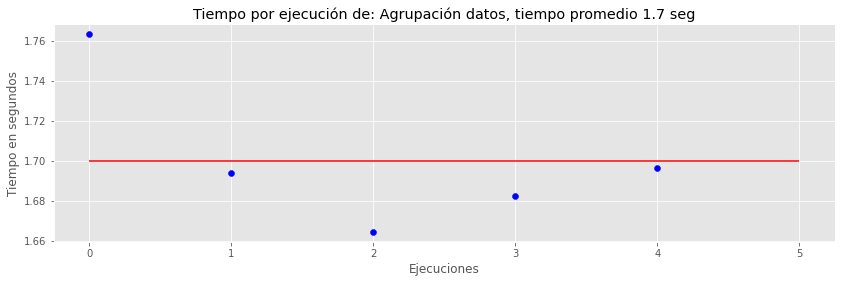

In [69]:
plot_time(g_data, name='Agrupación datos')

In [70]:
df_group_page.show(5)

+--------------------+-----+
|             user_id|count|
+--------------------+-----+
| usted se equivoc...|    1|
|     'offset': 97}]"|    1|
| and embraced an ...|    1|
| me encantan sus ...|    1|
| ¿se escandalizan...|    1|
+--------------------+-----+
only showing top 5 rows



In [71]:
s_data = []
for i in range(num):
    start_time = timeit.default_timer()
    df_group_page = df_group_page.orderBy("count",ascending=False)
    s_data.append(timeit.default_timer() - start_time)

In [72]:
df_group_page.show(5)

+-------+-------+
|user_id|  count|
+-------+-------+
|   null|1854495|
|      1| 426752|
|      7| 109770|
|     10|  92032|
|     13|  87556|
+-------+-------+
only showing top 5 rows



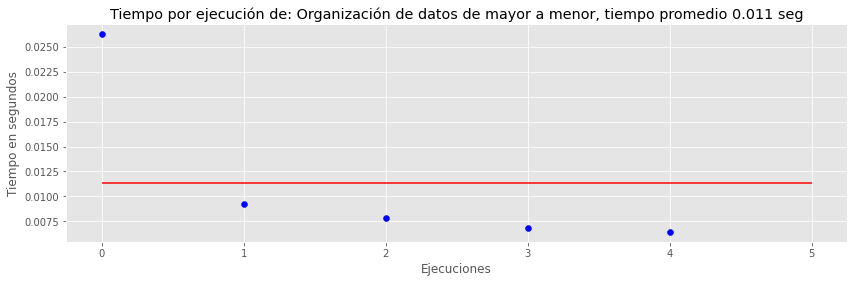

In [73]:
plot_time(s_data, name='Organización de datos de mayor a menor')

## Agrupación de datos por cuentas y publicaciones

En esta prueba se realizaran las siguientes operaciones:
1. Se agrupan los comentarios por el id de la cuenta y la publicación es decir los comentarios por cuenta y publicación
2. Se organizan por la cantidad de comentarios
3. Se reinicia el indice de los datos resultantes

In [74]:
g_data2 = []
for i in range(num):
    start_time = timeit.default_timer()
    df_org = sqlContext.read.csv(pyspark.SparkFiles.get(FOLDER_DATA + FILE),
                                 header=True, inferSchema= True)
    df_group_pub = df.groupBy('user_id').agg({'from_name': 'last',
                                              'id': 'count'})
    g_data2.append(timeit.default_timer() - start_time)

In [75]:
df_group_pub.show(5, truncate=False)

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+
|user_id                                                                                                                                                                                                |count(id)|last(from_name)      |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+
| 'offset': 97}]"                                                                                                                                                                                       |1        | 'offset': 81}       |
| and embraced an unwillingness to reason...that eventually gave

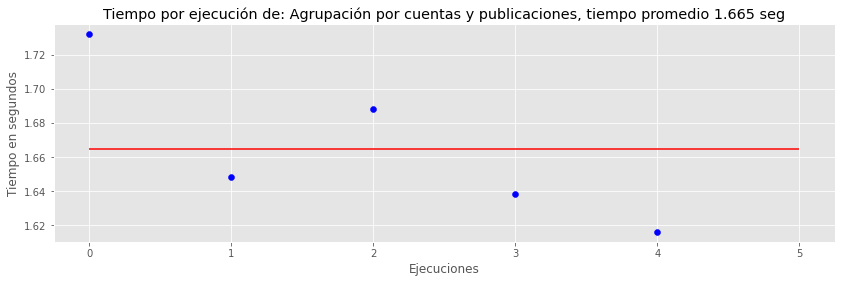

In [76]:
plot_time(g_data2, name='Agrupación por cuentas y publicaciones')

In [79]:
s_data = []
for i in range(num):
    start_time = timeit.default_timer()
    df_group_pub = df_group_pub.orderBy("count(id)",ascending=False)
    s_data.append(timeit.default_timer() - start_time)

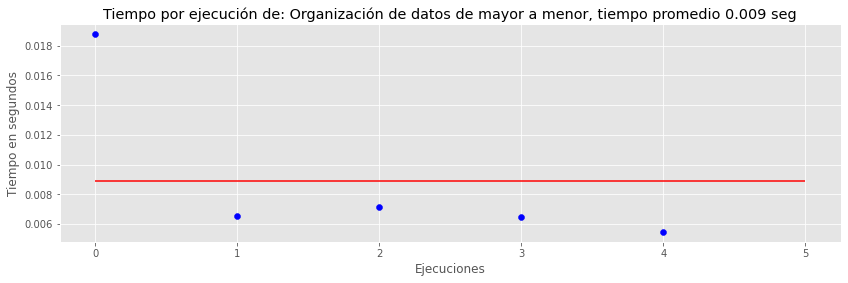

In [80]:
plot_time(s_data, name='Organización de datos de mayor a menor')

In [81]:
df_group_pub.show(5, truncate=False)

+-------+---------+---------------+
|user_id|count(id)|last(from_name)|
+-------+---------+---------------+
|1      |426752   |null           |
|null   |350762   |null           |
|7      |109770   |null           |
|10     |92031    |null           |
|13     |87556    |null           |
+-------+---------+---------------+
only showing top 5 rows



## Búsqueda de palabras en un dataframe

En este prueba se busca un vector de palabras dentro de los comentarios del dataframe, posteriormente estos datos se agruparan por cuenta

In [111]:
def words_filter(df, words):
    df_m = df
    df_m.withColumn('word', df.id * 0)
    df_m.withColumn('message',
                   F.lower(df_m.message))
    #df_m.message = df_m.message.apply(lambda x: str(x).lower())
    for i in range(df_m.count()):
        for word in words:
            if str(df_m.message.iloc[i]).find(str(word)) > 0:
                df_m.word.iloc[i] = "ok"
            else:
                continue
    
    df_m_filter = df_m[df_m.word == "ok"]
    return df_m_filter

In [112]:
words = [['perro', 'coronavirus'], ['rappy', 'domicilios.com', 'uber'], ['whatsapp']]

In [113]:
#df_2 = df.sample(n=20000)
df_2 = sqlContext.read.csv(pyspark.SparkFiles.get(FOLDER_DATA + FILE),
                           sep=',',
                           header=True,
                           inferSchema=True)
find_w = []
for i in range(num):
    start_time = timeit.default_timer()
    df_all_w = pd.DataFrame()
    for i in words:
        temp1 = words_filter(df_2, i)
        temp2 = temp1.groupby("user_id", as_index=False).id.count()
        df_all_w = pd.concat([df_all_w, temp2])
    find_w.append(timeit.default_timer() - start_time)

AttributeError: 'DataFrame' object has no attribute 'word'

In [ ]:
plot_time(find_w, name='Búsqueda de palabras en comentarios')

In [41]:
df_all_w

name  id
0   #estevirusloparamosunidos   1
1                   666d3v666   1
2                abi ayance 🌸   1
3                    abzurdah   1
4          agustina dominguez   1
..                        ...  ..
28            p. william cano   1
29               soul rebel 💥   1
30           tu cena perfecta   1
31                  will_i_am   1
32       🅴🆂🅲🅾🆁🆃🆂 🅴🅽 🅼🅾🅽🆃🅴🆁🆁🅴🆈   1

[274 rows x 2 columns]